In [382]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [356]:
data = pd.read_csv("bway-lk-data.csv")

In [357]:
# Starting EDA
print(data.shape)

(1268, 6)


In [358]:
list(data.columns)

['Week Endings',
 'Avg Ticket Price ($)',
 'Top Ticket Price ($)',
 'Seats Sold',
 'Seats in Theatre',
 '% Cap']

In [359]:
print(data.to_string())

      Week Endings Avg Ticket Price ($) Top Ticket Price ($) Seats Sold Seats in Theatre    % Cap
0     SEP 10, 2023              $140.01              $199.00     13,217            1,696   97.41%
1      SEP 3, 2023              $154.76              $199.00     13,423            1,696   98.93%
2     AUG 27, 2023              $156.39              $199.00     12,737            1,696   93.88%
3     AUG 20, 2023              $164.95              $199.00     13,499            1,696   99.49%
4     AUG 13, 2023              $184.73              $199.00     13,362            1,696   98.48%
5      AUG 6, 2023              $190.00              $199.00     13,124            1,696   96.73%
6     JUL 30, 2023              $189.94              $199.00     14,814            1,696   97.05%
7     JUL 23, 2023              $187.09              $199.00     13,202            1,696   97.30%
8     JUL 16, 2023              $183.80              $199.00     14,358            1,696   94.06%
9      JUL 9, 2023  

In [360]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Week Endings          1268 non-null   object
 1   Avg Ticket Price ($)  1268 non-null   object
 2   Top Ticket Price ($)  1243 non-null   object
 3   Seats Sold            1268 non-null   object
 4   Seats in Theatre      1268 non-null   object
 5   % Cap                 1268 non-null   object
dtypes: object(6)
memory usage: 59.6+ KB
None


In [361]:
for col in data.columns:
    print(data[col].value_counts())

Week Endings
SEP 10, 2023    1
DEC 11, 2005    1
OCT 23, 2005    1
OCT 30, 2005    1
NOV 6, 2005     1
               ..
JAN 26, 2014    1
FEB 2, 2014     1
FEB 9, 2014     1
FEB 16, 2014    1
OCT 19, 1997    1
Name: count, Length: 1268, dtype: int64
Avg Ticket Price ($)
$144.94    3
$77.20     3
$81.50     3
$57.14     3
$78.04     3
          ..
$127.50    1
$134.72    1
$125.96    1
$140.78    1
$58.12     1
Name: count, Length: 1179, dtype: int64
Top Ticket Price ($)
$225.00    229
$197.50    207
$250.00    181
$100.00    143
$90.00     107
$251.25     79
$199.00     78
$80.00      60
$240.00     54
$75.00      53
$200.00     28
$237.00      9
$85.00       3
$426.00      2
$347.00      2
$95.00       2
$297.00      1
$434.00      1
$252.00      1
$0.00        1
$397.00      1
$427.00      1
Name: count, dtype: int64
Seats Sold
13,419    15
14,518    11
14,515    11
13,421    11
13,422    10
          ..
13,179     1
15,097     1
13,038     1
12,607     1
10,645     1
Name: count, L

# Preliminary Analysis
1. From given data, there exists 6 columns, 1 of which might be redundant - seats in theatre. Since there exists both a seats sold and % capacity column. However, a future use of it remains to be seen, so, it is not dropped temporarily. There exist 1268 rows/records, each corresponding to a week.
2. Only one column, namely Top Ticket Prices, consists of obvious null values. Other null values in the form of other data might exist, however, it is unlikely since data scraping algorithm is made by me myself. And any other forms of null values would have mostly been recognized.
3. Avg ticket, top ticket prices, seats sold, seats in theatre, % cap can be transformed to numeric values. And Week Ending values can be transformed to data and time values. 

In [362]:
for col in data.columns:
    print(data[col].value_counts(dropna = False))
    print(data[col].value_counts(dropna = False).get(np.nan, 0))
    print(data[col].value_counts(dropna = False).get('', 0))

Week Endings
SEP 10, 2023    1
DEC 11, 2005    1
OCT 23, 2005    1
OCT 30, 2005    1
NOV 6, 2005     1
               ..
JAN 26, 2014    1
FEB 2, 2014     1
FEB 9, 2014     1
FEB 16, 2014    1
OCT 19, 1997    1
Name: count, Length: 1268, dtype: int64
0
0
Avg Ticket Price ($)
$144.94    3
$77.20     3
$81.50     3
$57.14     3
$78.04     3
          ..
$127.50    1
$134.72    1
$125.96    1
$140.78    1
$58.12     1
Name: count, Length: 1179, dtype: int64
0
0
Top Ticket Price ($)
$225.00    229
$197.50    207
$250.00    181
$100.00    143
$90.00     107
$251.25     79
$199.00     78
$80.00      60
$240.00     54
$75.00      53
$200.00     28
NaN         25
$237.00      9
$85.00       3
$426.00      2
$347.00      2
$95.00       2
$434.00      1
$0.00        1
$297.00      1
$397.00      1
$427.00      1
$252.00      1
Name: count, dtype: int64
25
0
Seats Sold
13,419    15
14,518    11
14,515    11
13,421    11
13,422    10
          ..
13,179     1
15,097     1
13,038     1
12,607     1

#Additional Insight:
1. Most null values are in the top ticket prices column only. However, from the above output, some records are seen to have 0 'seats in theatre' for some weeks, the records for these weeks will be checked to see if the data is corrupted or the seats were actually 0 then. Broadway might have also been closed during those weeks. 
Chore: To check the same value_counts output once after transformation and sorting by values

In [363]:
# Data Transformation start
data['Week Endings'] = pd.to_datetime(data['Week Endings'], format = "%b %d, %Y", errors = 'raise')
print(data['Week Endings'])

0      2023-09-10
1      2023-09-03
2      2023-08-27
3      2023-08-20
4      2023-08-13
          ...    
1263   1997-11-16
1264   1997-11-09
1265   1997-11-02
1266   1997-10-26
1267   1997-10-19
Name: Week Endings, Length: 1268, dtype: datetime64[ns]


In [364]:
data['Avg Ticket Price ($)'] = data['Avg Ticket Price ($)'].apply(lambda x: float(x[1:]))
print(data['Avg Ticket Price ($)'])

0       140.01
1       154.76
2       156.39
3       164.95
4       184.73
         ...  
1263     56.52
1264     56.42
1265     56.75
1266     58.12
1267     59.26
Name: Avg Ticket Price ($), Length: 1268, dtype: float64


In [365]:
top_price = data['Top Ticket Price ($)'].apply(lambda x: type(x))
top_price.value_counts(dropna = False)

Top Ticket Price ($)
<class 'str'>      1243
<class 'float'>      25
Name: count, dtype: int64

In top ticket price, data transformation similar to the 'avg ticket price' column was failing because the NaN was taken as float, and subscription of floats wasn't allowed, will look into how to ignore such values when doing data conversion, bcuz I want to deal with these values numerically, maybe replacing them with mean or mode, or the mean of the values of 5 weeks before and after it.

In [366]:
# Using .map() method to do data transformation for 'Top Ticket Price ($)' column since it allows an additional argument
# na_action to ignore NaN values as they are encountered
data['Top Ticket Price ($)'] = data['Top Ticket Price ($)'].map(lambda x: float(x[1:]), na_action = 'ignore')
print(data['Top Ticket Price ($)'])

0       199.0
1       199.0
2       199.0
3       199.0
4       199.0
        ...  
1263     75.0
1264     75.0
1265     75.0
1266     75.0
1267     75.0
Name: Top Ticket Price ($), Length: 1268, dtype: float64


In [367]:
# Here, we first replace all the commas with 'null' or smpty strings then convert to int
data['Seats Sold'] = data['Seats Sold'].apply(lambda x: int(x.replace(',', '')))
print(data['Seats Sold'])

0       13217
1       13423
2       12737
3       13499
4       13362
        ...  
1263    11397
1264    13372
1265    11811
1266    12460
1267    10645
Name: Seats Sold, Length: 1268, dtype: int64


In [368]:
# Here, we first replace all the commas with 'null' or smpty strings then convert to int
data['Seats in Theatre'] = data['Seats in Theatre'].apply(lambda x: int(x.replace(',', '')))
print(data['Seats in Theatre'])

0       1696
1       1696
2       1696
3       1696
4       1696
        ... 
1263    1745
1264    1745
1265    1745
1266    1745
1267    1745
Name: Seats in Theatre, Length: 1268, dtype: int64


In [369]:
data['% Cap'] = data['% Cap'].apply(lambda x: float(x[:-1]))
print(data['% Cap'])

0       97.41
1       98.93
2       93.88
3       99.49
4       98.48
        ...  
1263    81.64
1264    95.79
1265    84.61
1266    89.26
1267    87.15
Name: % Cap, Length: 1268, dtype: float64


In [370]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1268 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1268 non-null   float64       
 2   Top Ticket Price ($)  1243 non-null   float64       
 3   Seats Sold            1268 non-null   int64         
 4   Seats in Theatre      1268 non-null   int64         
 5   % Cap                 1268 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 59.6 KB
None


In [371]:
sorted_df = data.sort_values(by = 'Week Endings', ascending=False)
print(sorted_df[sorted_df['Seats in Theatre'] == 0])

    Week Endings  Avg Ticket Price ($)  Top Ticket Price ($)  Seats Sold  \
742   2007-11-25                   0.0                251.25           0   
743   2007-11-18                   0.0                251.25           0   

     Seats in Theatre  % Cap  
742                 0    0.0  
743                 0    0.0  


The above code output shows the dates at which the seats in theatre for broadway lion king were '0.'
Chore: further research to be done on the above to identify the reason for the same. Current hypothesis: data corruption/Broadway closed/External factors for the unaivalibility of seats

#Added: 
Important:
The dates at the above 2 data points were researched on, and it was found that all broadway shows had been ceased from Nov 18 - Nov 25 2007 due to the "2007 Broadway stagehand strike." Thus, we can conclude that the data was not corrupted and will drop these two points, since this data is of no insight. 
Datapoints 742, 743 dropped due to external factors affecting Broadway.

In [372]:
# Dropping the two strike day datapoints
data.drop(index=[742, 743], inplace=True)
print(data.shape)

(1266, 6)


In [373]:
# Confirming if data has been dropped accurately
print(data[data['Seats in Theatre'] == 0].shape)

(0, 6)


In [374]:
dates = data['Week Endings']
grouped_df = data.groupby(by=dates.dt.year)
mean_series = grouped_df['Top Ticket Price ($)'].mean()
print(mean_series)

Week Endings
1997     75.000000
1998     75.961538
1999     80.490196
2000     89.622642
2001     90.000000
2002    101.538462
2003    240.000000
2004    102.692308
2005    109.615385
2006    227.884615
2007    251.050000
2008    250.841346
2009    250.000000
2010    250.000000
2011    218.701923
2012    197.500000
2013    197.500000
2014    193.701923
2015    214.423077
2016    225.000000
2017    225.000000
2018    225.000000
2019    250.076923
2020    245.700000
2021           NaN
2022    199.000000
2023    199.000000
Name: Top Ticket Price ($), dtype: float64


#Data Cleaning:
I will be doing the following:
1. Setting the Top Ticket Price for all NaN values in year 2021 to 199, since all of them have been the same after 2020.
2. Setting the Top Ticket Price for other NaN values to the mean of the Top Ticket Price in their year.
Reasoning:
Broadway holds the show in different theatres at different times, and, as can be seen, the top ticket price remains consistent for a particular theatre, and is thus mostly unfluctuating in a year, especially after 2020.

In [375]:
# Setting the top ticket price for year 2021:
# This will be done manually bcuz there exists no mean for the year 2021, all values are NaN

# Setting the boolean mask first only, as we will be reusing it
boolean_mask = np.isnan(data['Top Ticket Price ($)']) & (data['Week Endings'].dt.year == 2021)
# Checking before assigning mean value:
print(data['Top Ticket Price ($)'][boolean_mask].head(3))
# Assigning mean value:
data.loc[boolean_mask, 'Top Ticket Price ($)'] = 199.0
# After data cleaning:
data['Top Ticket Price ($)'][boolean_mask].head(3)

89   NaN
90   NaN
91   NaN
Name: Top Ticket Price ($), dtype: float64


89    199.0
90    199.0
91    199.0
Name: Top Ticket Price ($), dtype: float64

In [376]:
def set_top_t_price_to_mean(weekdata):
    weekdata['Top Ticket Price ($)'] = mean_series[weekdata['Week Endings'].year]
    return weekdata

In [377]:
boolean_mask = np.isnan(data['Top Ticket Price ($)'])
data.loc[boolean_mask, : ] = data.loc[boolean_mask, : ].apply(set_top_t_price_to_mean, axis=1)
print(data[np.isnan(data['Top Ticket Price ($)'])])

Empty DataFrame
Columns: [Week Endings, Avg Ticket Price ($), Top Ticket Price ($), Seats Sold, Seats in Theatre, % Cap]
Index: []


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1266 entries, 0 to 1267
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Week Endings          1266 non-null   datetime64[ns]
 1   Avg Ticket Price ($)  1266 non-null   float64       
 2   Top Ticket Price ($)  1266 non-null   float64       
 3   Seats Sold            1266 non-null   int64         
 4   Seats in Theatre      1266 non-null   int64         
 5   % Cap                 1266 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 69.2 KB


In [379]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Week Endings,1266,2010-02-10 04:34:07.393364736,1997-10-19 00:00:00,2003-11-17 18:00:00,2009-12-30 12:00:00,2016-01-29 06:00:00,2023-09-10 00:00:00,NaN
Avg Ticket Price ($),1266.0,110.82421,56.08,77.415,105.16,140.5575,284.89,38.262011
Top Ticket Price ($),1266.0,185.384479,0.0,100.0,199.0,240.0,434.0,65.629698
Seats Sold,1266.0,13440.409163,5737.0,13117.0,13489.0,14218.0,16319.0,1068.010861
Seats in Theatre,1266.0,1717.136651,1598.0,1677.0,1696.0,1793.0,1801.0,55.111238
% Cap,1266.0,97.732314,53.33,97.065,99.75,100.51,103.46,5.003122


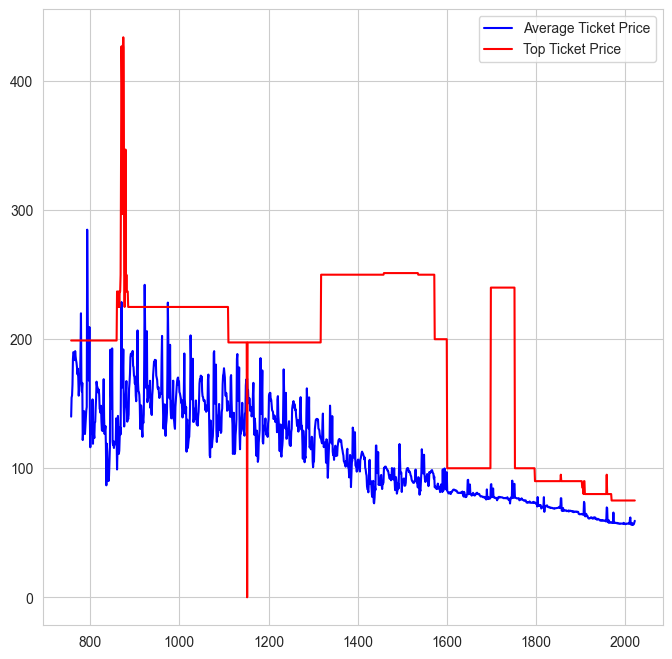

In [388]:
# Some basic plotting to check data scale to determine whether data needs to be normalised or not
# before being used with the sequence model for prediction
year = np.array(range(data.shape[0])) + 757
plt.figure(figsize=(8, 8))
plt.plot(year, data['Avg Ticket Price ($)'], color='b', label="Average Ticket Price")
plt.plot(year, data['Top Ticket Price ($)'], color='r', label="Top Ticket Price")
plt.legend(loc=1)
plt.show()

In [380]:
data.to_csv('final-data.csv', index=False)